# Hacklytics 2021
Anusha, Edward, Pravallika, Safia

# Import Required Tools

In [67]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import sklearn
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# Initial Data Exploration

Load files

In [93]:
country = "US"
url_start = "https://raw.githubusercontent.com/SafiaKhaleel/Hacklytics2021/main"
mobility_subfolder = "/Region_Mobility_Report_CSVs"
file_name = "/2020_" + country + "_Region_Mobility_Report.csv"
display(url_start + mobility_subfolder + file_name)
country_df = pd.read_csv(url_start + mobility_subfolder + file_name)

'https://raw.githubusercontent.com/SafiaKhaleel/Hacklytics2021/main/Region_Mobility_Report_CSVs/2020_US_Region_Mobility_Report.csv'

Preview

In [10]:
print(country_df.shape)
country_df.head()

(892368, 14)


country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  US  United States          NaN          NaN         NaN   
1                  US  United States          NaN          NaN         NaN   
2                  US  United States          NaN          NaN         NaN   
3                  US  United States          NaN          NaN         NaN   
4                  US  United States          NaN          NaN         NaN   

  iso_3166_2_code  census_fips_code        date  \
0             NaN               NaN  2020-02-15   
1             NaN               NaN  2020-02-16   
2             NaN               NaN  2020-02-17   
3             NaN               NaN  2020-02-18   
4             NaN               NaN  2020-02-19   

   retail_and_recreation_percent_change_from_baseline  \
0                                                6.0    
1                                                7.0    
2                                                6.0    
3                                                0.0    
4                                                2.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                2.0   
1                                                1.0   
2                                                0.0   
3                                               -1.0   
4                                                0.0   

   parks_percent_change_from_baseline  \
0                                15.0   
1                                16.0   
2                                28.0   
3                                 6.0   
4                                 8.0   

   transit_stations_percent_change_from_baseline  \
0                                            3.0   
1                                            2.0   
2                                           -9.0   
3                                            1.0   
4                                            1.0   

   workplaces_percent_change_from_baseline  \
0                                      2.0   
1                                      0.0   
2                                    -24.0   
3                                      0.0   
4                                      1.0   

   residential_percent_change_from_baseline  
0                                      -1.0  
1                                      -1.0  
2                                       5.0  
3                                       1.0  
4                                       0.0

See how many values are missing

In [92]:
display(country_df.isnull().sum())

country_region_code                                        0
country_region                                             0
sub_region_1                                             352
sub_region_2                                           18304
metro_area                                            892368
iso_3166_2_code                                       874416
census_fips_code                                       17952
date                                                       0
retail_and_recreation_percent_change_from_baseline    299200
grocery_and_pharmacy_percent_change_from_baseline     354737
parks_percent_change_from_baseline                    674297
transit_stations_percent_change_from_baseline         550962
workplaces_percent_change_from_baseline                25478
residential_percent_change_from_baseline              410488
dtype: int64

A lot of values seem to be missing. After exploring the data manually, it appears that there are many counties with incomplete data. Let us focus on the counties that have complete data. To do this, we drop the rows with incomplete data.

In [91]:
places = ['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces','residential']
places_percent_change = [place + '_percent_change_from_baseline' for place in places]
clean_country_df = country_df.dropna(axis = 0, subset = places_percent_change)
display(clean_country_df.isnull().sum())

country_region_code                                        0
country_region                                             0
sub_region_1                                             352
sub_region_2                                           17849
metro_area                                            172174
iso_3166_2_code                                       154677
census_fips_code                                       17497
date                                                       0
retail_and_recreation_percent_change_from_baseline         0
grocery_and_pharmacy_percent_change_from_baseline          0
parks_percent_change_from_baseline                         0
transit_stations_percent_change_from_baseline              0
workplaces_percent_change_from_baseline                    0
residential_percent_change_from_baseline                   0
dtype: int64

See which counties have enough entries

In [90]:
county_grouped_df = clean_country_df.groupby(['sub_region_1','sub_region_2']).count().reset_index()
display(county_grouped_df['date'])
state_county_pair = county_grouped_df[['sub_region_1', 'sub_region_2']][county_grouped_df['date']>300]
display(state_county_pair)

0      327
1      324
2      327
3      327
4      309
      ... 
316    327
317    327
318    307
319    327
320    328
Name: date, Length: 321, dtype: int64

sub_region_1       sub_region_2
0          Alabama     Baldwin County
1          Alabama     Madison County
2          Alabama      Mobile County
3          Alabama  Montgomery County
4          Alabama      Morgan County
..             ...                ...
316     Washington      Yakima County
317  West Virginia     Kanawha County
318      Wisconsin       Brown County
319      Wisconsin        Dane County
320      Wisconsin   Milwaukee County

[321 rows x 2 columns]

Only keep those counties in dataframe

In [57]:
merged = clean_country_df.merge(state_county_pair, how='outer', indicator=True)
merged[merged['_merge'] =='both'].index
clean_country_df = clean_country_df[(merged['_merge'] =='both').values]
#clean_country_df = clean_country_df[clean_country_df['sub_region_2'] in state_county_pair.]
clean_country_df.head()

country_region_code country_region sub_region_1    sub_region_2  \
1050                  US  United States      Alabama  Baldwin County   
1051                  US  United States      Alabama  Baldwin County   
1052                  US  United States      Alabama  Baldwin County   
1053                  US  United States      Alabama  Baldwin County   
1054                  US  United States      Alabama  Baldwin County   

      metro_area iso_3166_2_code  census_fips_code        date  \
1050         NaN             NaN            1003.0  2020-02-15   
1051         NaN             NaN            1003.0  2020-02-16   
1052         NaN             NaN            1003.0  2020-02-17   
1053         NaN             NaN            1003.0  2020-02-18   
1054         NaN             NaN            1003.0  2020-02-19   

      retail_and_recreation_percent_change_from_baseline  \
1050                                               17.0    
1051                                                8.0    
1052                                                9.0    
1053                                                7.0    
1054                                               12.0    

      grocery_and_pharmacy_percent_change_from_baseline  \
1050                                               12.0   
1051                                                8.0   
1052                                                9.0   
1053                                                8.0   
1054                                                9.0   

      parks_percent_change_from_baseline  \
1050                                55.0   
1051                               -12.0   
1052                                31.0   
1053                                21.0   
1054                                41.0   

      transit_stations_percent_change_from_baseline  \
1050                                            8.0   
1051                                            7.0   
1052                                            7.0   
1053                                            0.0   
1054                                            8.0   

      workplaces_percent_change_from_baseline  \
1050                                      6.0   
1051                                     -3.0   
1052                                     -3.0   
1053                                      2.0   
1054                                      3.0   

      residential_percent_change_from_baseline  
1050                                      -2.0  
1051                                       2.0  
1052                                       1.0  
1053                                       0.0  
1054                                      -1.0

Plot for one particular county

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F0E99FB88>,
      dtype=object)

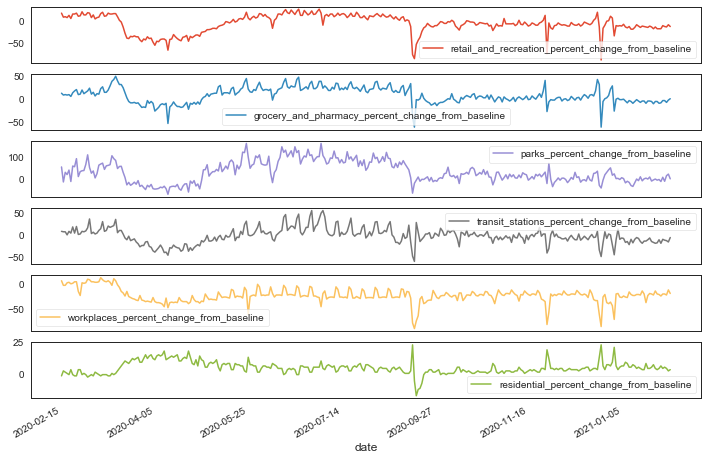

In [69]:
state, county = state_county_pair.loc[0]
state_idx = clean_country_df['sub_region_1']==state
county_idx = clean_country_df['sub_region_2']==county
clean_county_df = clean_country_df[state_idx & county_idx]
clean_county_df.plot(x='date',y=places_percent_change, subplots=True, kind='line')

There appears to be weekly spikes. Let's check if that is the case. Let's group by day of the week.

In [94]:
#clean_county_df['date']= pd.to_datetime(clean_county_df['date'])
week_df = clean_county_df[places_percent_change].groupby(clean_county_df['date'].dt.dayofweek).mean()
display(week_df)
dayofweek_averages = week_df.describe().mean().tolist()
display(dayofweek_averages)

retail_and_recreation_percent_change_from_baseline  \
date                                                       
0                                             -6.565217    
1                                             -7.108696    
2                                             -2.826087    
3                                             -7.108696    
4                                             -9.382979    
5                                             -6.770833    
6                                             -5.583333    

      grocery_and_pharmacy_percent_change_from_baseline  \
date                                                      
0                                              4.739130   
1                                              5.413043   
2                                              8.260870   
3                                              7.347826   
4                                              3.723404   
5                                             10.270833   
6                                             11.604167   

      parks_percent_change_from_baseline  \
date                                       
0                              20.021739   
1                              24.847826   
2                              32.500000   
3                              22.608696   
4                              50.489362   
5                              36.333333   
6                              37.604167   

      transit_stations_percent_change_from_baseline  \
date                                                  
0                                         -6.434783   
1                                         -4.695652   
2                                         -2.282609   
3                                         -4.152174   
4                                         -5.702128   
5                                         -0.458333   
6                                          8.166667   

      workplaces_percent_change_from_baseline  \
date                                            
0                                  -25.565217   
1                                  -25.826087   
2                                  -25.021739   
3                                  -26.782609   
4                                  -28.553191   
5                                  -12.020833   
6                                  -16.479167   

      residential_percent_change_from_baseline  
date                                            
0                                     5.000000  
1                                     5.652174  
2                                     4.652174  
3                                     5.565217  
4                                     5.893617  
5                                     2.458333  
6                                     2.395833

[-3.7079096000548484,
 6.784367980851873,
 26.67166821300057,
 0.09999795280850865,
 -15.367348740178004,
 4.432176689306537]

# Project Outline by High-level Functions
May need several low-level functions for each high-level function

## Import data

In [99]:
def import_dataframes(country="US", country_full_name="United%20States%20of%20America"):
    """Imports dataframes for specified country, will filter out rows unrelated to country
    url = "https://raw.githubusercontent.com/SafiaKhaleel/Hacklytics2021/main"
    url = "https://github.com/saudiwin/corona_tscs/tree/master/data/CoronaNet/data_country/coronanet_release_allvars"
    """
    url_prefix = "https://raw.githubusercontent.com/SafiaKhaleel/Hacklytics2021/main/Region_Mobility_Report_CSVs/2020_"
    url_suffix = "_Region_Mobility_Report.csv"
    mobility_df = pd.read_csv(url_prefix + country + url_suffix)
    
    url_prefix = "https://raw.githubusercontent.com/saudiwin/corona_tscs/tree/master/data/CoronaNet/data_country/coronanet_release_allvars/coronanet_release_allvars_"
    url_suffix = ".csv"
    covid_df = pd.read_csv(url_prefix + country_full_name + url_suffix)
    return mobility_df,covid_df

In [100]:
mobility_df,covid_df = import_datasets()
display(mobility_df.head())
display(gov_df.head())

InvalidURL: URL can't contain control characters. '/saudiwin/corona_tscs/tree/master/data/CoronaNet/data_country/coronanet_release_allvars/coronanet_release_allvars_United\\ States\\ of\\ America.csv' (found at least ' ')

## Preprocess data

In [ ]:
def preprocess_mobility_df(mobility_df, minimum_data=300):
    """Takes the raw mobility dataframe and does the following:
    
    -Removes rows will null mobility data
    
    -Removes counties with insufficient data (<minimum_data)
    
    -Returns clean data with the following columns (renamed): state,county,date,6 mobility columns
    
    -May need to aggregate by states if covid_df does not provide county information
    """
    clean_mobility_df = None
    return clean_mobility_df

In [ ]:
clean_mobility_df = preprocess_mobility_df(mobility_df)
#display(clean_mobility_df.head())

In [ ]:
def preprocess_covid_df(covid_df):
    """Takes the raw covid cases/death/government info dataframe and does the following:
    
    Not sure yet what needs to be done, this dataset is very interesting, some useful columns are:
        date_announced, date_start, date_end, description, country, province, type
        
    Sadly there is no county level data
    
    type: restrictions on mass gatherings, external border restrictions, restriction and regulation of business,
        closure and regulation of schools, health resources.
        
    could try to use this to model mobility response to government policies: such as panic buying,
        compliance of stay-at-home orders, travel before lock-down etc
    could try to use this to model covid case/death response to government policies and mobility
    
    -Returns clean data with the at least the following columns (renamed): state,county(if possible),date,cases
    """
    clean_covid_df = None
    return clean_covid_df

In [ ]:
clean_covid_df = preprocess_covid_df(covid_df)
#display(clean_covid_df.head())

## Merge data

In [ ]:
def merge_dataframes(clean_mobility_df, clean_covid_df):
    """Combines the three dataframes we have. Inner join by columns state, county(if possible) and date."""
    merged_df = None
    return merged_df

In [ ]:
merged_df = merge_dataframes(clean_mobility_df,clean_covid_cases_df, clean_covid_death_df)
#display(merged_df)

## Visualize merged data

In [ ]:
def plot_merged_df(merged_df):
    """Plots a time series of mobility, cases and deaths using subplot
    x-axis: time
    y-axis: mobility/cases/death
    if possible include vertical lines when new policies announced/in-effect
    """
    cols = None
    merged_df.plot(x='date',y=cols, subplots=True, kind='line')
    return None

In [ ]:
plot_merged_df(merged_df)

## Simple statistical time-series analysis

Directly apply https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9 to our 8 time series. No machine learning algorithm required. We wish to see if there is a leader-follower relationship between the time series.

Let 1-6 indicate our mobility data, 7-8 indicate case and death data

Maybe preprocessing to convert cases to logarithmic scale could help

for sanity check that method is reasonable, quantify synchrony between 7 and 8 as we expect death count to follow case count

quantify synchrony between 1-6 and 7-8

## Machine Learning

Preprocess features by batching over 7 days (to remove intra-weekly fluctuations)

Features: (for example take $\lambda \in [5,10]$ days as expected lag for cases, $\gamma$ = 7 days as expected batch size (since cases have cyclic behavior that is weekly))

COVID new cases in previous period $nc_{0} = \sum_{\tau \in (t-\gamma, t]} c_{\tau}$, $nc_{k} = \sum_{\tau \in (t+(k-1)\gamma, t+k\gamma]} c_{\tau}$

COVID new cases delta in previous period $d_{0} = nc_{0}-nc_{-1}$, $d_{k} = nc_{k} - nc_{k-1}$

COVID new cases change in delta $dd_{0} = d_{0} - d_{-1}$, $dd_{k} = d_{k} - d_{k-1}$

Same as above for COVID new deaths.

For mobility data, delta and delta change probably not as important so only do mobility cases in previous period

Government policy type

Response Var (possibilities):

Given information at time $<t$

COVID new cases in the next period $[t+\lambda,t+\lambda+\gamma]$ where $\lambda$ = expected lag, $\gamma$ = period size

COVID new cases delta (diff between new cases next period and previous period)

COVID new cases change in delta (diff between change in new cases next period and previous period)

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
def cross_validation (reg_model,x_data,y_data,k):
  scores=cross_val_score(reg_model,x_data,y_data,cv=k)
  np.mean(scores)
    
#Splitting Dataset
def split_dataset(ts):
  x_data = df[['attributes']]
  y_data = df[['target_variable']]
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=ts)
  print("x_train ({0}):\n{1}".format(len(x_train), x_train.head()))
  print("\ny_train ({0}):\n{1}".format(len(y_train), y_train.head()))
  print("\nx_test ({0}):\n{1}".format(len(x_test), x_test.head()))
  print("\ny_test ({0}):\n{1}".format(len(y_test), y_test.head()))

#To find the order of the polynomial
def order_select(n,reg_model,x_train,y_train,x_test,y_test):
  rsquare_test =[]
  order= range(1,n+1)
  for n in order:
    pr= PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    reg_model.fit(x_train_pr,y_train)
    rsquare_test.append (lr.score(x_test_pr,y_test))
    
#to perform grid search
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
def grid_search (x_data,y_data,k):
  params= [{'alpha':[0.001,0.01,0.1,1,10,100]}]
  RR=Ridge()
  grid= GridSearchCV(RR,params,cv=k)
  grid.fit(x_data,y_data)
  grid.best_estimator_
  scores=grid.cv_results_
  scores['mean_test_score']